In [1]:
IRdisplay::display_html("
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>")

# *Principal Component Analysis*

- El análisis de componentes principales es un proceso en donde se calculan las mayores "influencias" de los datos, la idea es es obtener comprensión mediante una matriz de datos.
- PCA tiene un enfoque de aprendizaje no supervisado. Por lo cual se tienen $M$ variables $x_i$ sin etiquetas $y_i$.
- La idea principal es **reducir la dimensionalidad** del conjunto de datos, es decir, buscar las componentes que permitan explicar la mayor parte de la variabilidad utilizando menos variables. 
- Generalmente se utiliza esta técnica como una primera aproximación para ver el comportamiento de los datos.
- Evitar **multicolinealidad**.

![PCA_example1](images/pca_example_1.png)


> Se requiere una transformación ($y_i$) que ubique el primer eje en el sentido de la mayor dispersión de puntos, luego el segundo eje en la dirección de la segunda dispersión y así sucesivamente.


Si tenemos un conjunto $X$ de $n$ observaciones y $p$ columnas:

$$X = \begin{pmatrix} x_{11} & ... & x_{1p} \\ & ... &\\ x_{n1}& ...&  x_{np} \\ \end{pmatrix} $$


- Se requiere una transformación lineal e invertible $T$ tal que al truncar $T$ se produzca una mínima pérdida de varianza.
- Se requiere una transformación ortonormal que minimice lavarianza de los nuevosyipara poder truncarlos.



Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$:

$$max_{w} \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:
$$\hat{\sigma}^2(Xw) = w'X'Xw - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde $\hat{\Sigma}$ es la varianza empírica de $X$: 

$$\hat{\Sigma} = X'X = \begin{pmatrix} \sum_{i=1}^n (x_{i1})^2  & ... &\sum_{i=1}^n (x_{i1}x_{id}) \\ & ... &\\ \sum_{i=1}^n (x_{id}x_{i1}) & ... & \sum_{i=1}^n (x_{id})^2 \\ \end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:
$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:
$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$, y por lo tanto
$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo. Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio.


# Variaciones del método

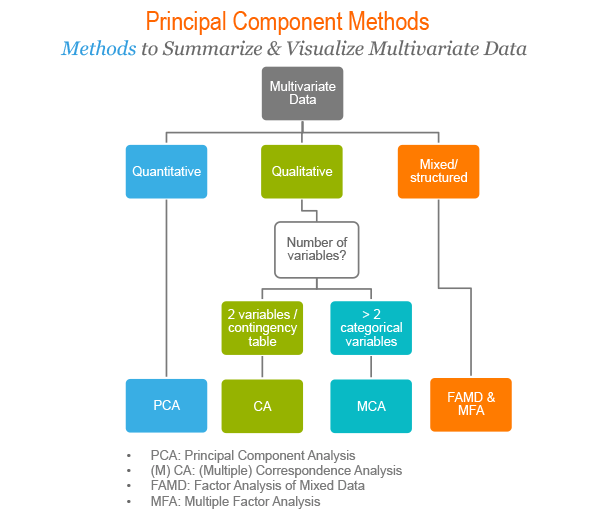

Fuente: [STHDA](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/)


## Ejemplo


Un  problema  clásico  de  macro-economía  es  analizar  los  países  según  sus  características  socio-económicas. Lo fundamental del análisis es comparar los diferentes países según su desarrollo relativo y construir un indicador socio-económico que permita clasificarlos. Un   ejemplo   clásico   es   el   análisis   realizado   entre   los   países   latinoamericanos,   los   datos   correspondientes al año 1979 se muestran en la siguiente tabla.



![PCA_example2](images/PCA1.png)

La matriz de correlación es la siguiente:

![PCA_example3](images/PCA2.png)

Un  análisis  de  Componentes  Principales  arroja  los  siguientes  resultados,  para  las  dos  primeras  componentes  
- Primer valor propio normalizado 0,65  Vector propio: $[-0,47; 0,51; 0,12; -0,52; 0,48]$. 
- Segundo valor propio normalizado:  0,23  Vector propio: $[-0,28; 0,005; 0,89; 0,21; -0,29]$.

![PCA_example4](images/PCA3.png)



In [3]:
library(ggpubr)
library(FactoMineR)
library(factoextra)

In [4]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

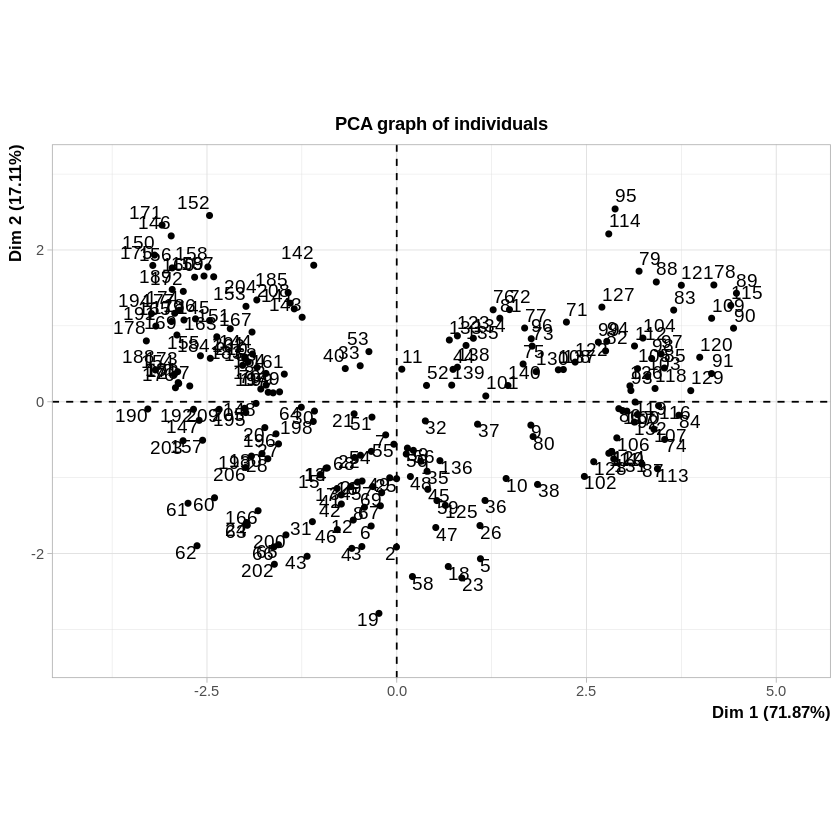

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 210 individuals, described by 7 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

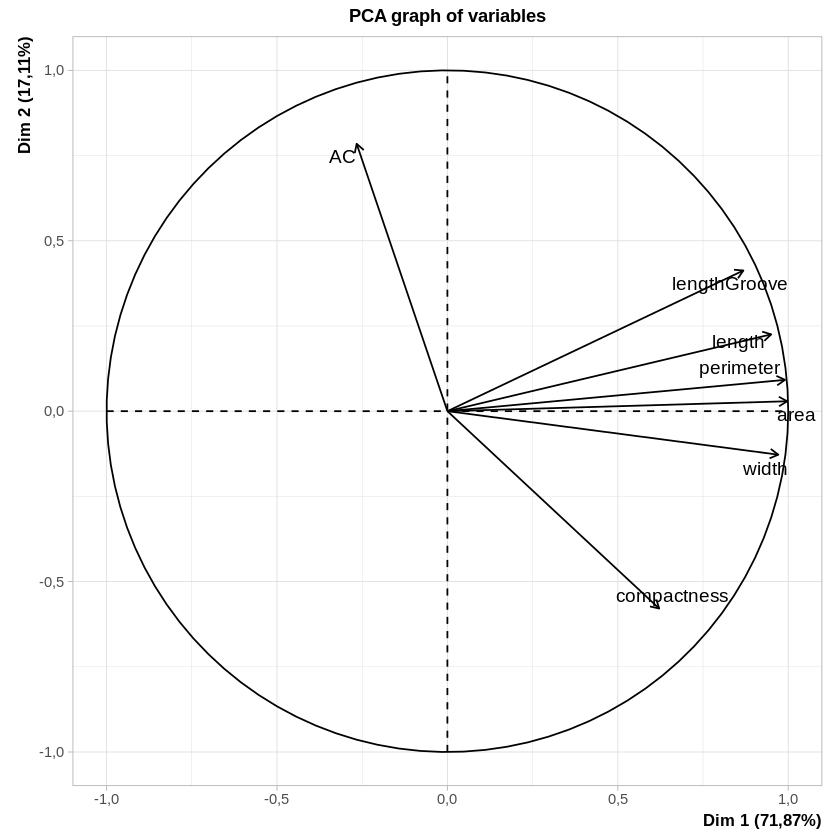

In [6]:
PCA(seeds[,-c(8)], scale.unit = TRUE, ncp = 5, graph = TRUE)

In [ ]:
seeds